## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
root='/content/drive/My Drive/Datasets/Week 5/'
train_data=pd.read_csv(root+'Logistic_X_Train.csv')
train_label=pd.read_csv(root+'Logistic_Y_Train.csv')

## Data Exploration

In [ ]:
pd.concat([train_data,train_label],axis=1).head()

,f1,f2,label
0,0.574727,0.787277,0
1,0.251502,0.908940,0
2,1.860578,0.013763,1
3,0.019477,1.047210,0
4,0.029794,0.252236,1


In [ ]:
train_label['label'].unique() 

array([0, 1])

In [ ]:
train_data.info() #all values are non-null
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2250 non-null   float64
 1   f2      2250 non-null   float64
dtypes: float64(2)
memory usage: 35.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   2250 non-null   int64
dtypes: int64(1)
memory usage: 17.7 KB


### Normalize?
* It can be seen below that the values are already small and close to each other hence no need to normalize

In [ ]:
print('Maximum value in f1 row is :',train_data['f1'].max())
print('Minimum value in f1 row is: ',train_data['f1'].min())
print('Maximum value in f2 row is: ',train_data['f2'].max())
print('Minimum value in f2 row is: ',train_data['f2'].min())

Maximum value in f1 row is : 2.4435708019866
Minimum value in f1 row is:  -1.4248117761873722
Maximum value in f2 row is:  1.4377286376046732
Minimum value in f2 row is:  -0.9707690780868654


### Plotting the data
* It can be seen that we will need a non linear classifier such as Support Vector Machine.

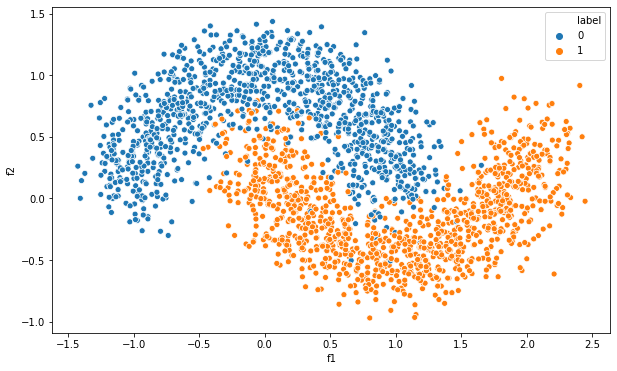

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='f1', y='f2', ax=ax,
                data=pd.concat([train_data,train_label],axis=1),
                hue='label')

### Cheking balance of data
* It's a balanced dataset

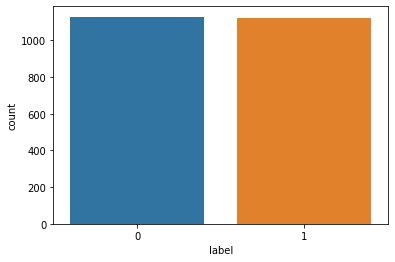

In [ ]:
sns.countplot(x='label', data=train_label)

### Data Distribution
* Well distributed data, with no outliers
* Both f1 and f2 have sufficient variation in both classes.

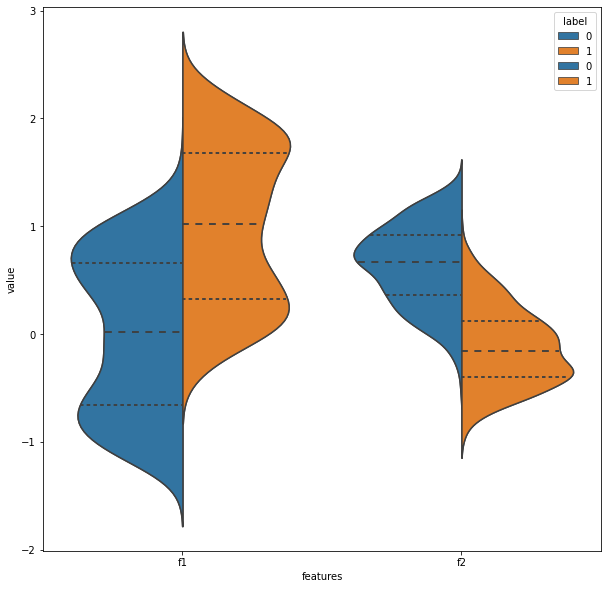

In [ ]:
data=pd.concat([train_data, train_label],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")

## Fit model

### Non DL models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
X_train, X_val, y_train, y_val =  train_test_split(np.array(train_data), np.squeeze(np.array(train_label)), test_size=0.2)

In [ ]:
classifiers=(('xgb',xgb.XGBClassifier()),
             ('Naive bayes',GaussianNB()),
             ('Logistic Regression',LogisticRegression()),
             ('Decision Tree',DecisionTreeClassifier()),
             ('Random Forest',RandomForestClassifier(n_estimators=100)),
             ('SVM',SVC()))
liste=[]
for name, clf in classifiers:
  clf.fit(X_train,y_train)
  predictions =clf.predict(X_val)
  liste.append(predictions)
  ac = accuracy_score(y_val,predictions)
  print('Accuracy using {} is {:.4f}: '.format(name,accuracy_score(y_val,predictions)))

Accuracy using xgb is 0.9578: 
Accuracy using Naive bayes is 0.8667: 
Accuracy using Logistic Regression is 0.8622: 
Accuracy using Decision Tree is 0.9378: 
Accuracy using Random Forest is 0.9578: 
Accuracy using SVM is 0.9600: 


* As expected SVM performs best
* It's confusion matrix

In [ ]:
X_val.shape

(450, 2)

In [ ]:
pred=np.copy(liste[5])
pred[pred!=y_val]=2

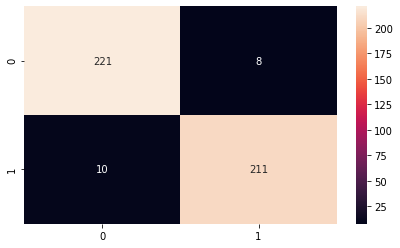

In [ ]:
fig = plt.subplots(figsize=(7,4))
cm = confusion_matrix(y_val,liste[5])
sns.heatmap(cm,annot=True,fmt="d");

### Multi Layer Perceptron

In [ ]:
def lr_scheduler(epoch):
  if epoch>100:
    return 0.01
  else:
    return 0.0001

In [ ]:
# building a model with keras
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(16, input_shape=(2,)))  # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 16)                48        
_________________________________________________________________
activation_91 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_92 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 9         
_________________________________________________________________
activation_93 (Activation)   (None, 1)                 0         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_______________________________________________________

In [ ]:
opt=keras.optimizers.adamax(learning_rate=0.01)
model.compile( 
    loss='binary_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)
model.fit(x=X_train, 
          y=y_train,
          batch_size=64,
          epochs=100, 
          #callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
          validation_data=(X_val,y_val))

Train on 1800 samples, validate on 450 samples
Epoch 1/100
1800/1800 [==============================] - 0s 80us/step - loss: 0.6214 - accuracy: 0.5544 - val_loss: 0.5813 - val_accuracy: 0.7867
Epoch 2/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.5461 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.8089
Epoch 3/100
1800/1800 [==============================] - 0s 28us/step - loss: 0.4807 - accuracy: 0.8133 - val_loss: 0.4554 - val_accuracy: 0.8244
Epoch 4/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.4304 - accuracy: 0.8272 - val_loss: 0.4158 - val_accuracy: 0.8356
Epoch 5/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.3961 - accuracy: 0.8344 - val_loss: 0.3897 - val_accuracy: 0.8378
Epoch 6/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.3716 - accuracy: 0.8378 - val_loss: 0.3683 - val_accuracy: 0.8489
Epoch 7/100
1800/1800 [==============================] - 0s 24us/step - loss:

### Testing on Test Data

In [ ]:
def get_classes(predictions):
  predictions[predictions>0.5]=1
  predictions[predictions<0.5]=0
  return predictions

In [ ]:
X_test=pd.read_csv('/content/drive/My Drive/Datasets/Week 5/Logistic_X_Test.csv')

In [ ]:
predictions.shape

(750, 1)

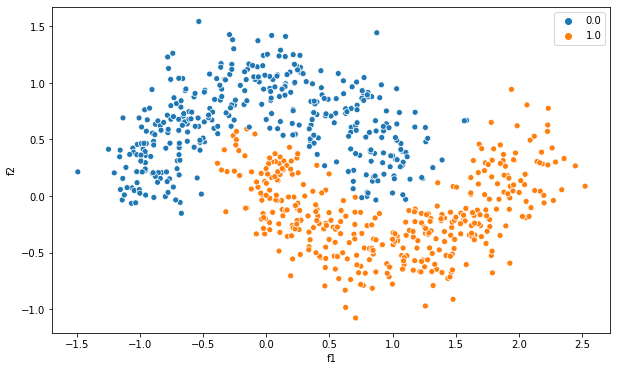

In [ ]:
predictions=model.predict(X_test)
predictions=get_classes(predictions)
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='f1', y='f2', ax=ax,
                data=X_test,
                hue=predictions.reshape(predictions.shape[0]))

### Conclusion
* MLP performed quite well as compared to non DL models